In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("Car details.csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
data.isnull().sum().sum()

1100

In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [10]:
data=data.dropna(how="any")


In [12]:
data.isnull().sum().sum()

0

In [14]:
import re

In [21]:
torque_list=data["torque"].tolist()
torque_rpm=[]
for i in torque_list:
    res=i.replace(".","")
    res=res.replace(",","")
    temp=[int(s) for s in re.findall(r'\d+',res)]
    torque_rpm.append(max(temp))
    
torque_rpm

[2000,
 2500,
 2700,
 2750,
 4500,
 11375,
 4500,
 2500,
 2400,
 2000,
 2250,
 4500,
 2000,
 3500,
 3600,
 1750,
 2750,
 3000,
 2750,
 2000,
 1750,
 2000,
 1750,
 3500,
 4000,
 3500,
 1750,
 3500,
 2500,
 1750,
 3000,
 4000,
 1750,
 3500,
 3500,
 4850,
 4000,
 2700,
 2500,
 2500,
 4600,
 4800,
 4000,
 1750,
 3500,
 3400,
 3400,
 4000,
 1750,
 2500,
 1750,
 4400,
 1750,
 3400,
 3600,
 2500,
 4000,
 3000,
 2800,
 3000,
 4000,
 2750,
 2000,
 4000,
 4000,
 3000,
 1750,
 3500,
 3000,
 1750,
 1750,
 4000,
 2000,
 3400,
 2000,
 4000,
 2500,
 3600,
 3250,
 4600,
 3500,
 4000,
 3500,
 3500,
 9904,
 3000,
 3500,
 3750,
 9904,
 3800,
 3500,
 4000,
 2000,
 4000,
 3000,
 2750,
 3500,
 3000,
 4200,
 3000,
 4000,
 2800,
 4250,
 4850,
 4500,
 3000,
 2800,
 2500,
 2750,
 2750,
 4000,
 3500,
 1750,
 4000,
 3500,
 1900,
 2750,
 3250,
 2000,
 4250,
 3500,
 3000,
 1750,
 3000,
 1750,
 4500,
 3000,
 5200,
 2500,
 4300,
 2250,
 2400,
 2500,
 2500,
 5000,
 1800,
 3600,
 4600,
 4000,
 400,
 2750,
 1750,
 1600,

In [24]:
data["torque"]=torque_rpm
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,3000,5.0


In [41]:
mileage=data["mileage"].tolist()
m=[]
for i in mileage:
    
    for s in i.split(" "):
        try:
            m.append(float(s))
        except:
            pass
m

[23.4,
 21.14,
 17.7,
 23.0,
 16.1,
 20.14,
 17.3,
 16.1,
 23.59,
 20.0,
 19.01,
 17.3,
 19.3,
 18.9,
 18.15,
 24.52,
 23.0,
 19.7,
 22.54,
 21.0,
 25.5,
 26.59,
 21.5,
 20.3,
 21.4,
 24.7,
 18.2,
 18.9,
 16.8,
 24.3,
 14.0,
 18.6,
 24.3,
 33.44,
 23.95,
 17.0,
 20.63,
 13.93,
 16.1,
 16.0,
 17.8,
 16.8,
 18.5,
 24.3,
 23.95,
 12.55,
 12.99,
 14.8,
 24.7,
 13.5,
 26.0,
 20.65,
 27.3,
 11.36,
 12.99,
 17.68,
 14.28,
 18.53,
 14.84,
 21.12,
 20.36,
 21.27,
 26.59,
 18.16,
 21.4,
 22.0,
 25.1,
 20.51,
 21.66,
 24.3,
 24.3,
 20.36,
 25.2,
 12.55,
 22.9,
 16.02,
 20.54,
 12.99,
 22.77,
 15.71,
 23.1,
 19.02,
 24.7,
 24.7,
 19.81,
 14.0,
 26.2,
 16.47,
 19.81,
 15.04,
 18.2,
 18.5,
 26.59,
 19.1,
 19.7,
 22.54,
 21.79,
 18.8,
 21.21,
 15.37,
 21.4,
 11.79,
 19.0,
 17.0,
 14.3,
 15.8,
 15.1,
 19.09,
 22.32,
 21.9,
 14.53,
 21.63,
 24.3,
 20.85,
 20.51,
 20.45,
 19.67,
 23.0,
 19.3,
 23.01,
 23.1,
 19.7,
 20.77,
 17.92,
 20.77,
 17.8,
 17.01,
 22.37,
 19.33,
 9.5,
 12.83,
 13.5,
 22.48,
 16.78

In [44]:
data["mileage"]=m
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,3000,5.0


In [52]:
engine=data["engine"].tolist()
eng=[]
for i in engine:
    
    for s in i.split(" "):
        try:
            eng.append(int(s))
        except:
            pass
data["engine"]=eng


AttributeError: 'int' object has no attribute 'split'

In [54]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85 bhp,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110 bhp,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.9 bhp,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70 bhp,3000,5.0


In [56]:
max_power=data["max_power"].tolist()
power=[]
for i in max_power:
    
    for s in i.split(" "):
        try:
            power.append(float(s))
        except:
            pass
data["max_power"]=power
data


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,3000,5.0


In [58]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,19.419861,1458.708829,91.587374,3474.631419,5.416393
std,3.863695,8.135827e+05,5.679230e+04,4.036263,503.893057,35.747216,2579.612132,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,400.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,16.780000,1197.000000,68.050000,2500.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,3000.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,22.320000,1582.000000,102.000000,4000.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,43639.000000,14.000000


<AxesSubplot:>

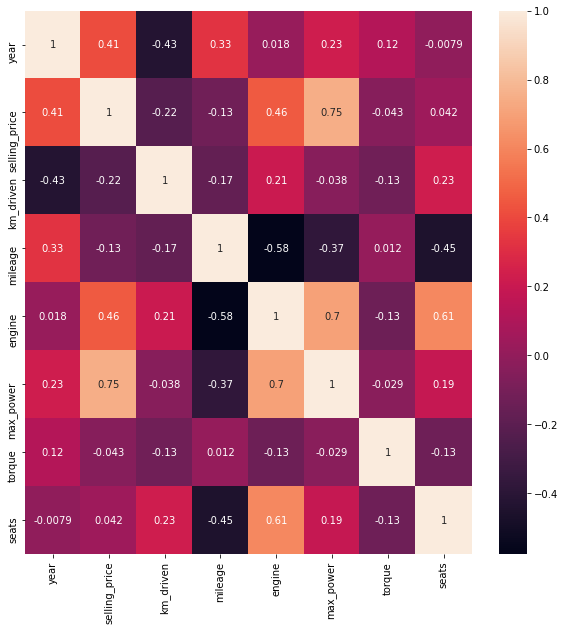

In [65]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [68]:
data["transmission"].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

In [69]:
def categorical_integer1(x):
    if x=='Manual':
        return 1
    else :
        return 0
data["transmission"]=data["transmission"].map(categorical_integer1)

In [70]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,1,First Owner,23.40,1248,74.00,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,1,Second Owner,21.14,1498,103.52,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,1,Third Owner,17.70,1497,78.00,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,1,First Owner,23.00,1396,90.00,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,1,First Owner,16.10,1298,88.20,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,1,First Owner,18.50,1197,82.85,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,1,Fourth & Above Owner,16.80,1493,110.00,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,1,First Owner,19.30,1248,73.90,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,1,First Owner,23.57,1396,70.00,3000,5.0


In [72]:
data["seller_type"].value_counts()

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

In [73]:
def categorical_integer2(x):
    if x=='Individual':
        return 1
    elif x== 'Dealer':
        return 0
    else :
        return -1
data["seller_type"]=data["seller_type"].map(categorical_integer2)

In [76]:
data["fuel"].value_counts()

Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: fuel, dtype: int64

In [77]:
def categorical_integer3(x):
    if x=='Diesel':
        return 1
    elif x== 'Petrol':
        return 0
    else :
        return -1
data["fuel"]=data["fuel"].map(categorical_integer3)

In [78]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,First Owner,23.40,1248,74.00,2000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,Second Owner,21.14,1498,103.52,2500,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,1,Third Owner,17.70,1497,78.00,2700,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,First Owner,23.00,1396,90.00,2750,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,1,First Owner,16.10,1298,88.20,4500,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0,1,1,First Owner,18.50,1197,82.85,4000,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493,110.00,2750,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,First Owner,19.30,1248,73.90,2000,5.0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,First Owner,23.57,1396,70.00,3000,5.0


In [80]:
data["owner"].value_counts()

First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [91]:
owners=pd.get_dummies(data['owner'])
new_data=pd.concat([data,owners],axis=1)

In [92]:
new_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,First Owner,23.40,1248,74.00,2000,5.0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,Second Owner,21.14,1498,103.52,2500,5.0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,1,Third Owner,17.70,1497,78.00,2700,5.0,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,First Owner,23.00,1396,90.00,2750,5.0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,1,First Owner,16.10,1298,88.20,4500,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0,1,1,First Owner,18.50,1197,82.85,4000,5.0,1,0,0,0,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,Fourth & Above Owner,16.80,1493,110.00,2750,5.0,0,1,0,0,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,First Owner,19.30,1248,73.90,2000,5.0,1,0,0,0,0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,First Owner,23.57,1396,70.00,3000,5.0,1,0,0,0,0


In [93]:
new_data=new_data.drop(["owner"],axis=1)

In [94]:
new_data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,23.40,1248,74.00,2000,5.0,1,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,21.14,1498,103.52,2500,5.0,0,0,1,0,0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,1,17.70,1497,78.00,2700,5.0,0,0,0,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,23.00,1396,90.00,2750,5.0,1,0,0,0,0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,1,16.10,1298,88.20,4500,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,0,1,1,18.50,1197,82.85,4000,5.0,1,0,0,0,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,16.80,1493,110.00,2750,5.0,0,1,0,0,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,1,1,1,19.30,1248,73.90,2000,5.0,1,0,0,0,0
8126,Tata Indigo CR4,2013,290000,25000,1,1,1,23.57,1396,70.00,3000,5.0,1,0,0,0,0


In [95]:
y=new_data["selling_price"]
x=new_data.drop(["selling_price","name"],axis=1)

In [96]:
x

,year,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,145500,1,1,1,23.40,1248,74.00,2000,5.0,1,0,0,0,0
1,2014,120000,1,1,1,21.14,1498,103.52,2500,5.0,0,0,1,0,0
2,2006,140000,0,1,1,17.70,1497,78.00,2700,5.0,0,0,0,0,1
3,2010,127000,1,1,1,23.00,1396,90.00,2750,5.0,1,0,0,0,0
4,2007,120000,0,1,1,16.10,1298,88.20,4500,5.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,0,1,1,18.50,1197,82.85,4000,5.0,1,0,0,0,0
8124,2007,119000,1,1,1,16.80,1493,110.00,2750,5.0,0,1,0,0,0
8125,2009,120000,1,1,1,19.30,1248,73.90,2000,5.0,1,0,0,0,0
8126,2013,25000,1,1,1,23.57,1396,70.00,3000,5.0,1,0,0,0,0


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

In [100]:
xtrain, xtest, ytrain, ytest = train_test_split(x[:4000], y[:4000], test_size=0.2)

In [101]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [103]:
random_model.fit(xtrain, ytrain)

y_pred = random_model.predict(xtest)
random_model_accuracy = round(random_model.score(xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.33 %


In [110]:
import pickle 

with open('mypickle.pickle', 'wb') as f:
    pickle.dump(random_model, f)